# Red Wine Clustering Project(Aditya Chowdhury)

Importing necessary libraries and loading the dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

wine=pd.read_csv('winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Data Shape

In [2]:
wine.shape

(1599, 12)

Data detailed information

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Data description

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking null values

In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Distribution of data

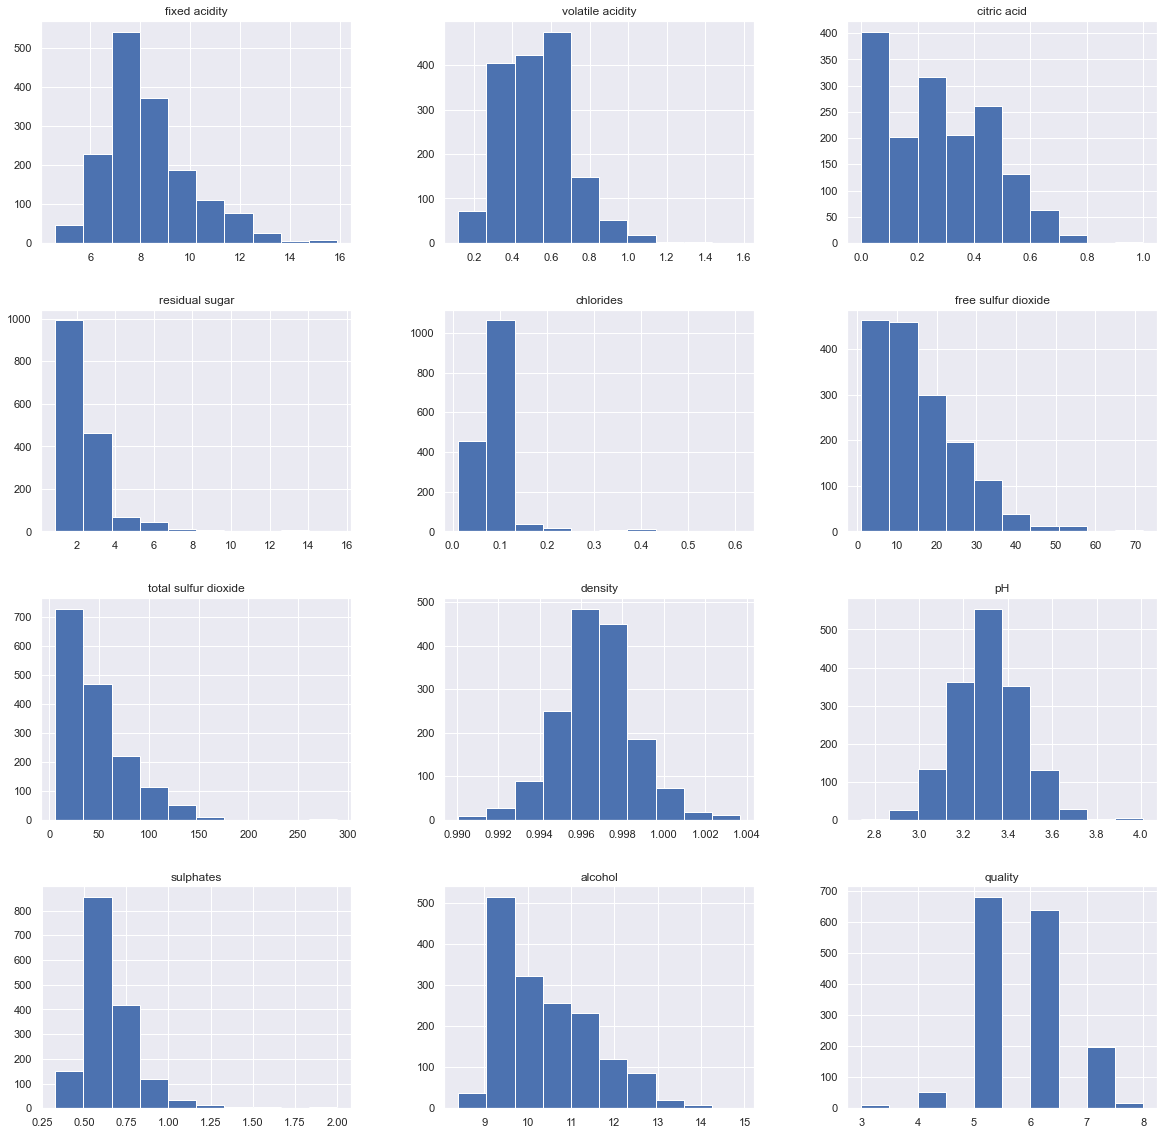

In [6]:
wine.hist(figsize=(20,20))
plt.show()

Distribution of data

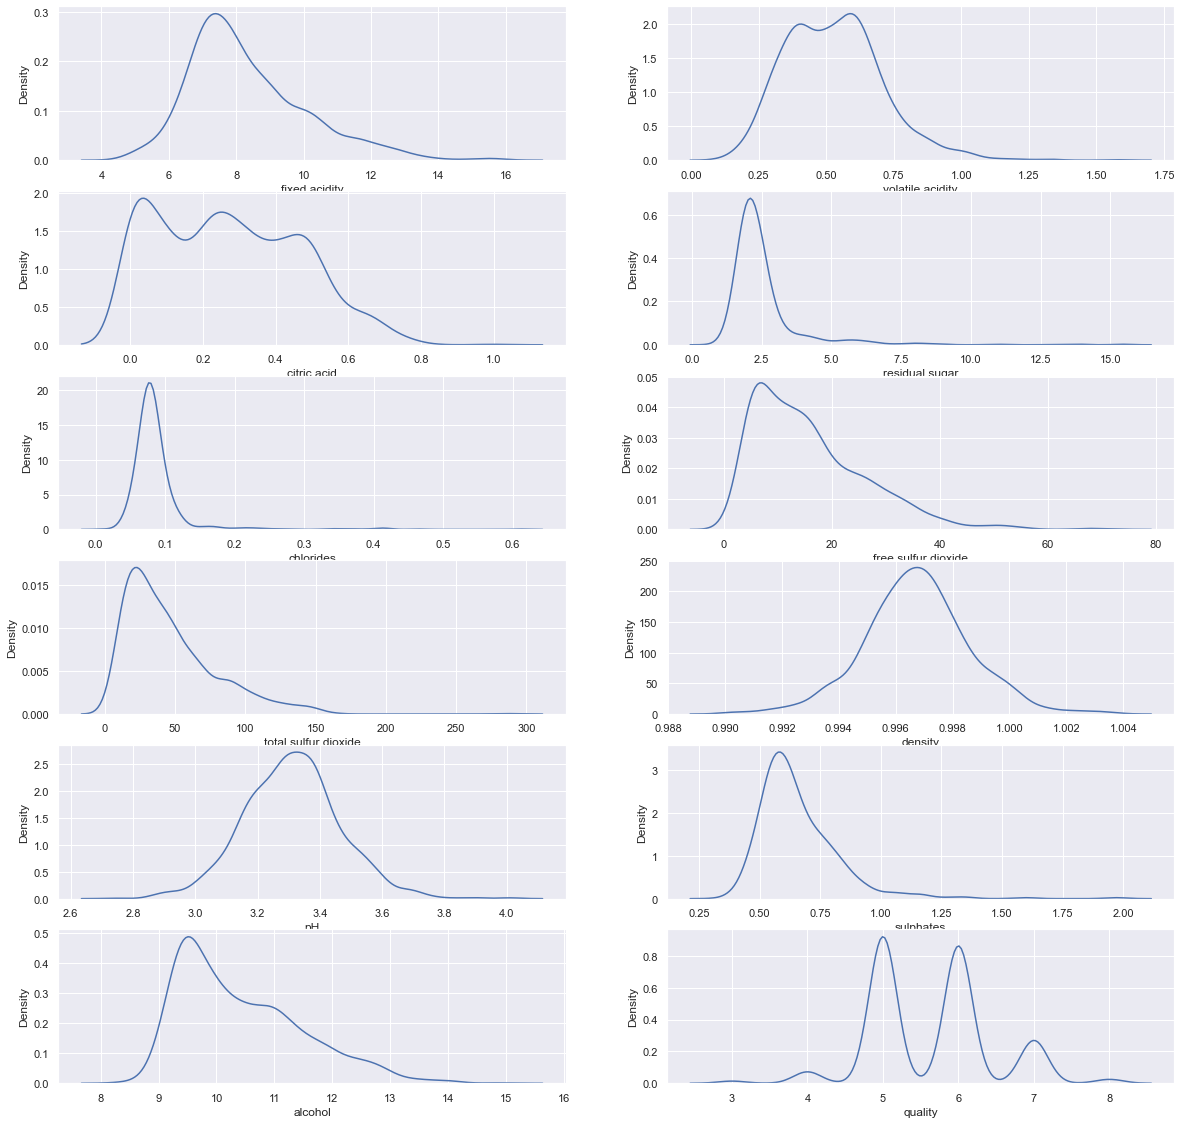

In [7]:
plt.figure(figsize=(20,30))
for i, col in enumerate(wine.columns):
    if wine[col].dtype!='object':
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(wine[col],ax=ax)
        
plt.show()

Checking missing values

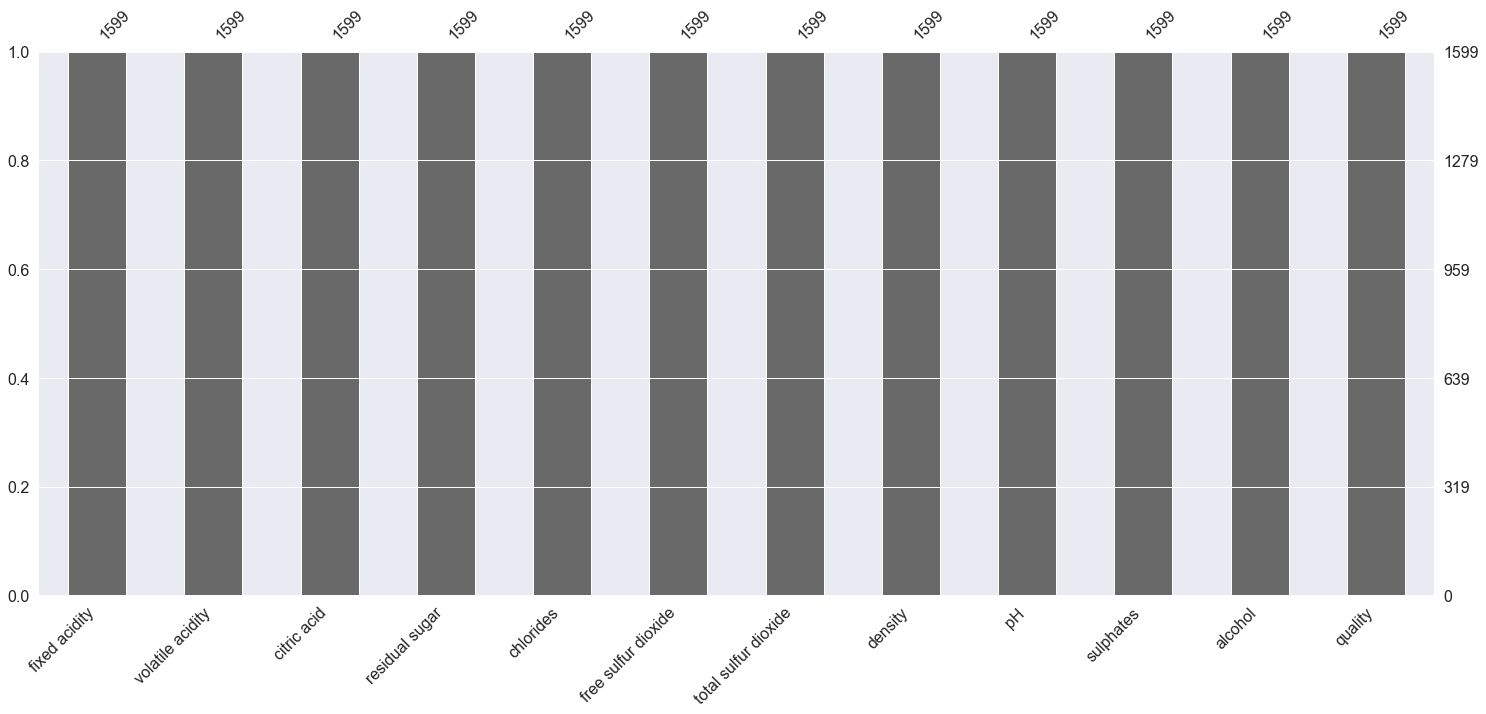

In [9]:
msno.bar(wine)
plt.show()

Checking duplicate values

In [10]:
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [11]:
wine.drop_duplicates(inplace=True)
wine[wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Checking for Outliers

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


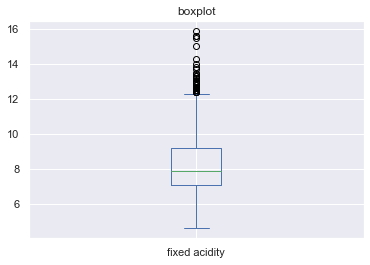

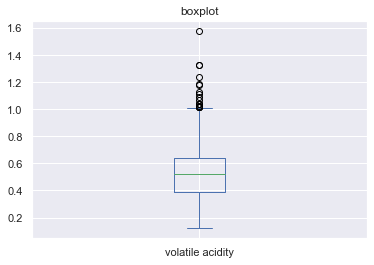

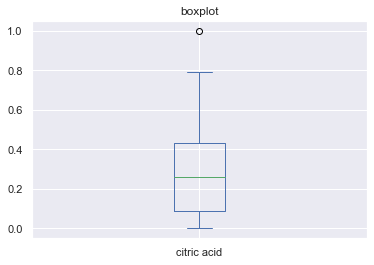

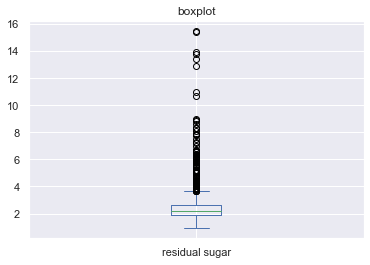

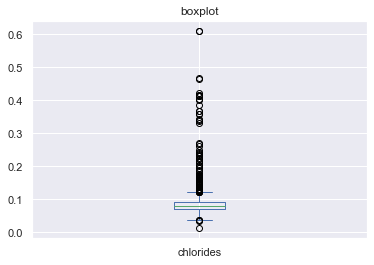

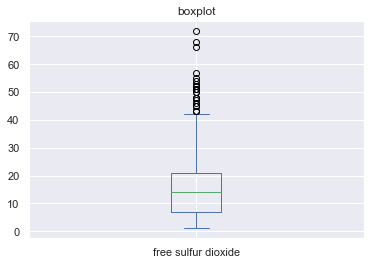

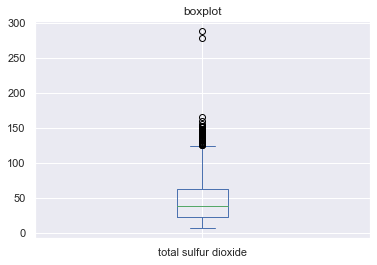

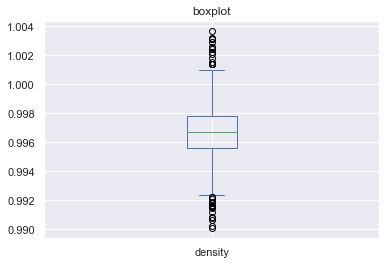

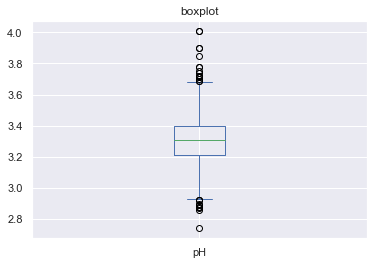

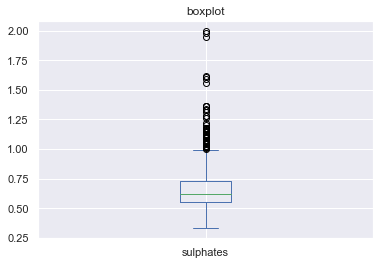

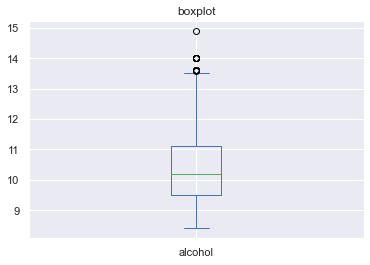

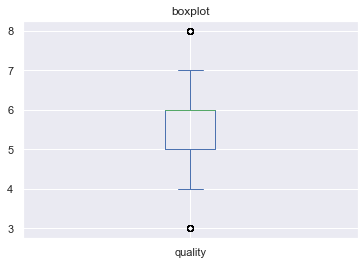

In [13]:
cols = list(wine.columns)
print(cols)
for col in cols:
    a=wine[col].plot(kind='box',title='boxplot')
    plt.show()

Outlier treatment of data

In [15]:
for col in cols:
    Q1=wine[col].quantile(.25)
    Q3=wine[col].quantile(.75)
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)
    wine[col]=np.where(wine[col]>upper,upper,np.where(wine[col]<lower,lower,wine[col]))

Outliers have been removed

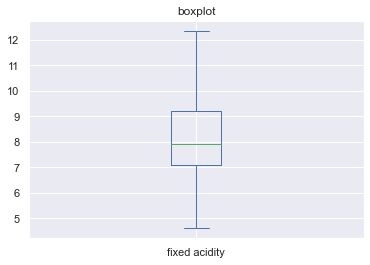

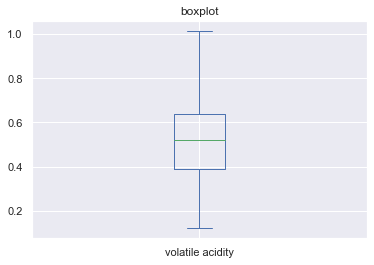

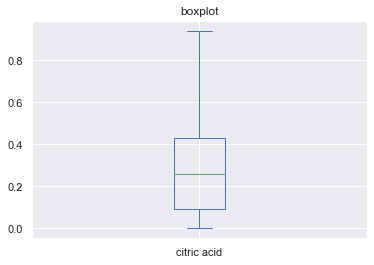

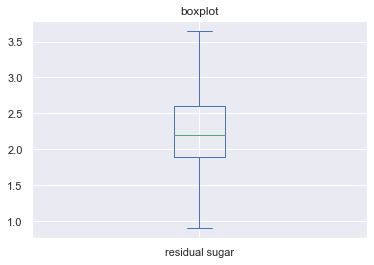

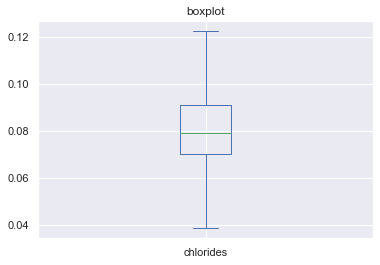

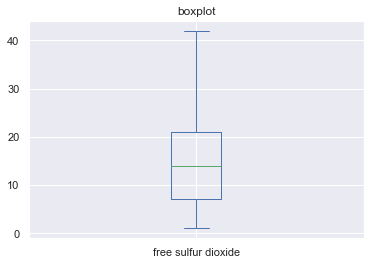

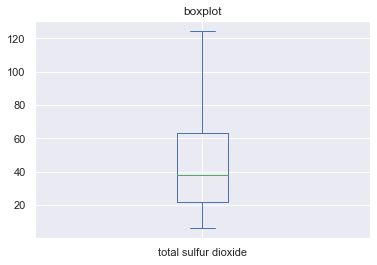

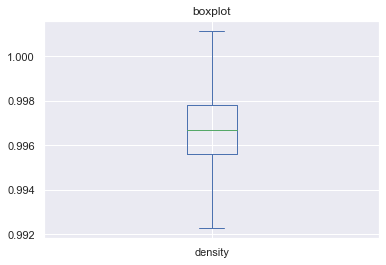

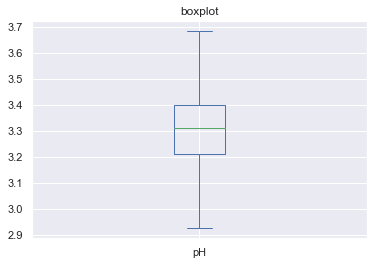

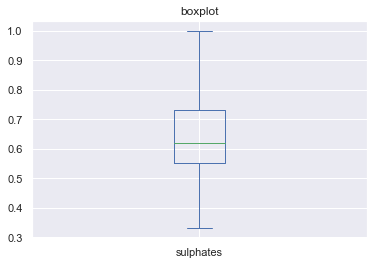

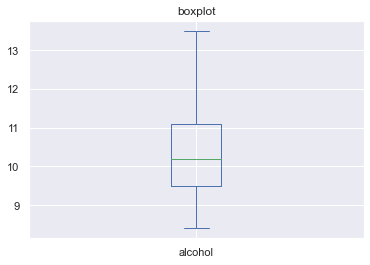

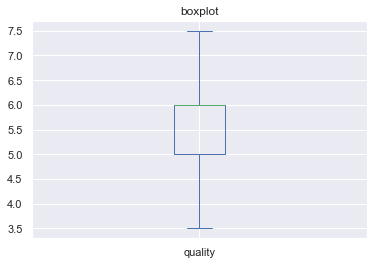

In [16]:
for col in cols:
    a=wine[col].plot(kind='box',title='boxplot')
    plt.show()

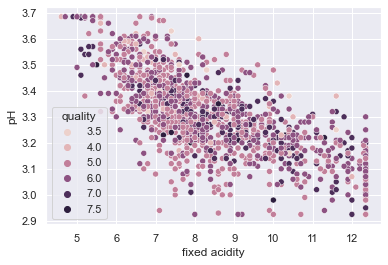

In [20]:
sns.scatterplot(x='fixed acidity',y='pH',hue='quality',data=wine)
plt.show()

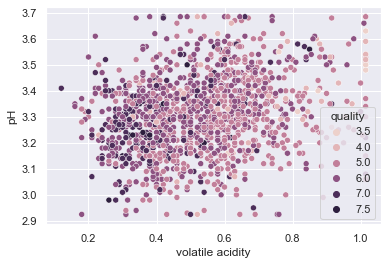

In [24]:
sns.scatterplot(x='volatile acidity',y='pH',hue='quality',data=wine)
plt.show()

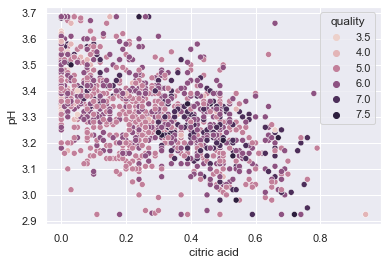

In [25]:
sns.scatterplot(x='citric acid',y='pH',hue='quality',data=wine)
plt.show()

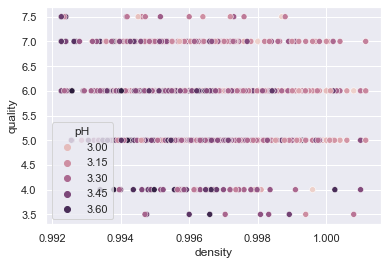

In [26]:
sns.scatterplot(x='density',y='quality',hue='pH',data=wine)
plt.show()

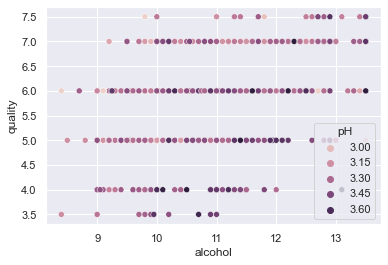

In [28]:
sns.scatterplot(x='alcohol',y='quality',hue='pH',data=wine)
plt.show()

Correlation Matrix

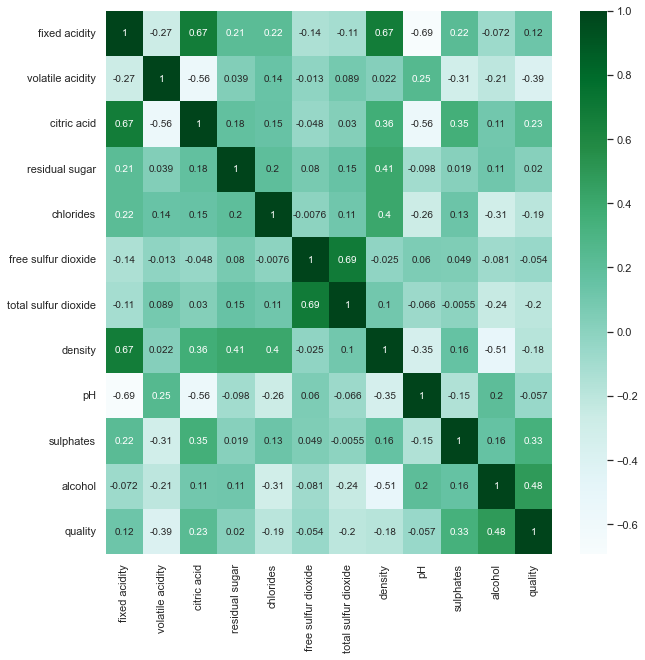

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),cbar=True,cmap='BuGn',annot=True)
plt.show()

# K-Means Clustering

Clustering 2 features

Finding optimal K using Elbow Method

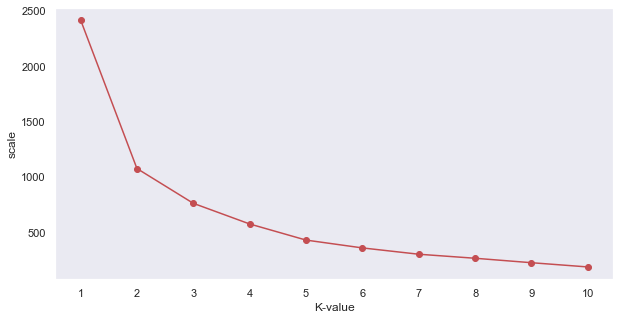

In [33]:
f2=wine[['alcohol','quality']]
from sklearn.cluster import KMeans
arr1=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(f2)
    arr1.append(km.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),arr1,'r-o')
plt.grid()
plt.xlabel('K-value')
plt.ylabel('scale')
plt.xticks(np.arange(1,11,1))
plt.show()


Finding optimal K using Silhouette Method

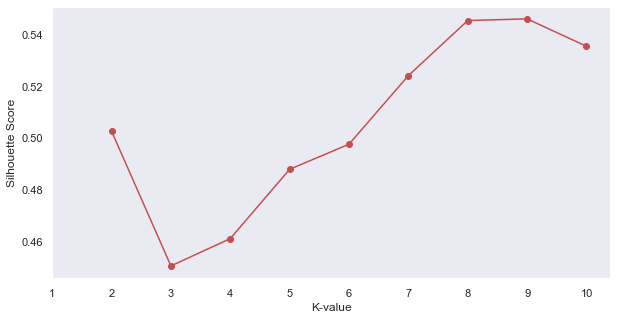

In [34]:
f2=wine[['alcohol','quality']]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
silhouette_avg=[]

for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit(f2)
    silhouette_avg.append(silhouette_score(f2,km.labels_))


plt.figure(figsize=(10,5))
plt.plot(range(2,11),silhouette_avg,'r-o')
plt.grid()
plt.xlabel('K-value')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(1,11,1))
plt.show()

So K=3

In [35]:
km1=KMeans(n_clusters=3)
km1.fit(f2)
l1=km1.predict(f2)
wine1=wine
wine1['Label']=l1
wine1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,2


Cluster visualization via scatter plot

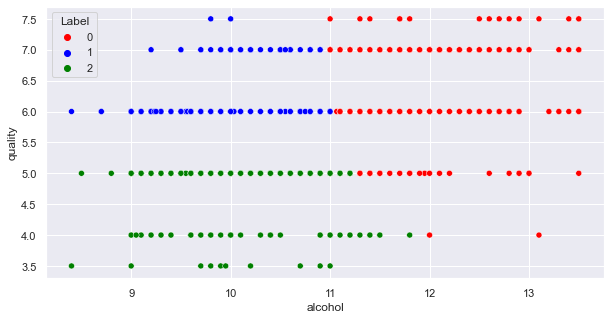

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='alcohol',y='quality',hue='Label',
                palette=['red','blue','green'],legend='full',data=wine1)
plt.show()

Cluster evaluation metrics (2 features)

In [38]:
ss_km_2d=silhouette_score(f2,l1)
dbs_km_2d=davies_bouldin_score(f2,l1)
print('Silhouette score for model is:',ss_km_2d)
print('davies_bouldin_score for model is:',dbs_km_2d)

Silhouette score for model is: 0.45054952140739357
davies_bouldin_score for model is: 0.8563794758166319


Clustering 3 features(3D)

In [ ]:
mcs.head(1)

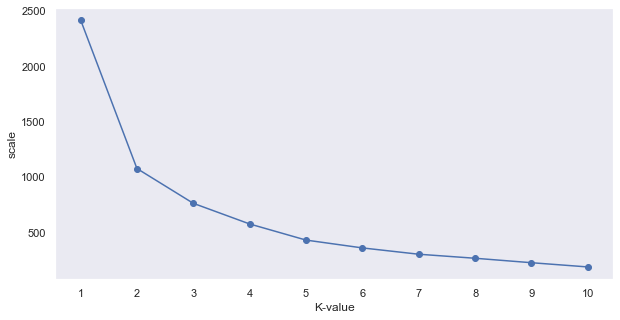

In [39]:
from mpl_toolkits.mplot3d import Axes3D
f3=wine[['sulphates','alcohol','quality']]
arr2=[]
for j in range(1,11):
    km2=KMeans(n_clusters=j,init='k-means++')
    km2.fit(f3)
    arr2.append(km2.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),arr1,'b-o')
plt.grid()
plt.xlabel('K-value')
plt.ylabel('scale')
plt.xticks(np.arange(1,11,1))
plt.show()
    


Silhouette Method(Optimal Number of k)

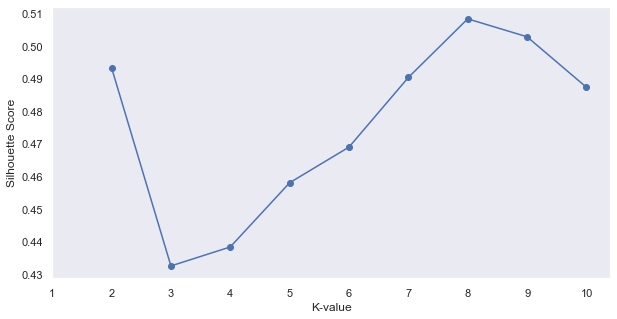

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
silhouette_avg_3d=[]

for i in range(2,11):
    km2=KMeans(n_clusters=i,init='k-means++')
    km2.fit(f3)
    silhouette_avg_3d.append(silhouette_score(f3,km2.labels_))


plt.figure(figsize=(10,5))
plt.plot(range(2,11),silhouette_avg_3d,'b-o')
plt.grid()
plt.xlabel('K-value')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(1,11,1))
plt.show()

So K=3

In [41]:
km3=KMeans(n_clusters=3)
km3.fit(f3)
l2=km3.predict(f3)
wine2=wine
wine2['Label']=l2
wine2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,1


3D scatter plot for clustering 

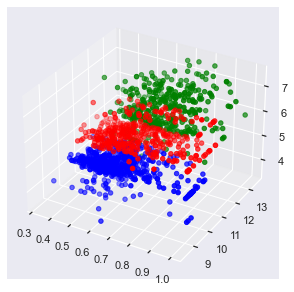

In [42]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(wine2['sulphates'][wine2.Label==0],wine2['alcohol'][wine2.Label==0],
           wine2['quality'][wine2.Label==0],c='red')
ax.scatter(wine2['sulphates'][wine2.Label==1],wine2['alcohol'][wine2.Label==1],
           wine2['quality'][wine2.Label==1],c='blue')
ax.scatter(wine2['sulphates'][wine2.Label==2],wine2['alcohol'][wine2.Label==2],
           wine2['quality'][wine2.Label==2],c='green')

plt.show()

Cluster Evaluation metrics (3 features)

In [43]:
ss_km_3d=silhouette_score(f3,l2)
dbs_km_3d=davies_bouldin_score(f3,l2)
print('Silhouette score for model is:',ss_km_3d)
print('davies_bouldin_score for model is:',dbs_km_3d)

Silhouette score for model is: 0.43250445322008363
davies_bouldin_score for model is: 0.8820762757450705


Customer id's and number of customers for each group

In [45]:
wine_grp1=wine2[wine2['Label']==0]
wine_grp2=wine2[wine2['Label']==1]
wine_grp3=wine2[wine2['Label']==2]

print('Total number of wines in group 1:',len(wine_grp1))

print('Total number of wines in group 2:',len(wine_grp2))

print('Total number of wines in group 3:',len(wine_grp3))


Total number of wines in group 1: 408
Total number of wines in group 2: 608
Total number of wines in group 3: 343


# Agglomerative Hierarchical Clustering

In [46]:
features=pd.read_csv('winequality-red.csv')
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


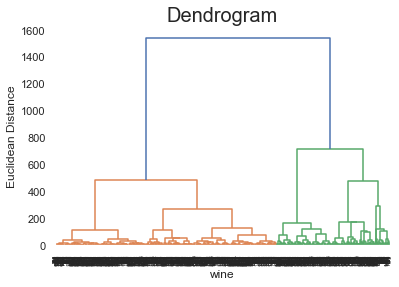

In [47]:
import scipy.cluster.hierarchy as sch 
dend=sch.dendrogram(sch.linkage(features,method='ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('wine')
plt.ylabel('Euclidean Distance')
plt.show()

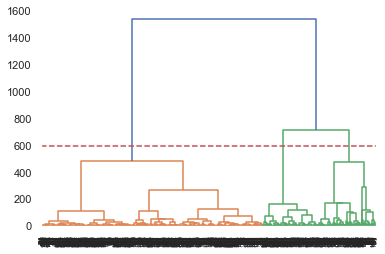

In [49]:
#Drawing horizontal line
dend_1=sch.dendrogram(sch.linkage(features,method='ward'))
plt.axhline(y=600,color='r',linestyle='--')
plt.show()

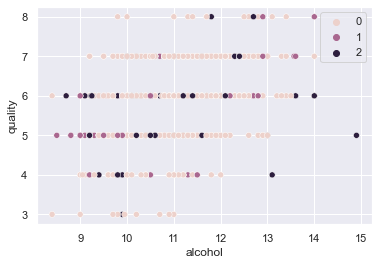

In [50]:
#Visualizing clusters(n_clusters=3)
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score
clust_1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clust_1.fit_predict(features)
sns.scatterplot(x='alcohol',y='quality',hue=clust_1.labels_,data=features)
plt.show()

Cluster Evaluation Metrics (clusters=3)

In [51]:
ss_3c=silhouette_score(features,clust_1.labels_)
dbs_3c=davies_bouldin_score(features,clust_1.labels_)
print('Silhouette score for model is:',ss_3c)
print('davies_bouldin_score for model is:',dbs_3c)

Silhouette score for model is: 0.4588550686100878
davies_bouldin_score for model is: 0.7342776305773907
